In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Analyses
from src.analyses.schedule_jobs_dataframe import jobs_metrics_from_operations_df, mean_start_deviation_per_shift_df

df_experiments = pd.read_csv("data/experiments_v01_gt.csv")
df_experiments

,Experiment_ID,Abs Lateness Ratio,Inner Tardiness Ratio,Max Bottleneck Utilization,Sim Sigma,Shift Length,w_t,w_e,w_dev,Experiment_Type,max_utilization
0,G-1,0.0,0.0,0.75,0.1,1440,0,0,1,GT_SLACK,0.75
1,G-2,0.0,0.0,0.75,0.2,1440,0,0,1,GT_SLACK,0.75
2,G-3,0.0,0.0,0.75,0.3,1440,0,0,1,GT_SLACK,0.75
3,G-7,0.0,0.0,0.85,0.1,1440,0,0,1,GT_SLACK,0.85
4,G-8,0.0,0.0,0.85,0.2,1440,0,0,1,GT_SLACK,0.85
5,G-9,0.0,0.0,0.85,0.3,1440,0,0,1,GT_SLACK,0.85
6,G-13,0.0,0.0,0.95,0.1,1440,0,0,1,GT_SLACK,0.95
7,G-14,0.0,0.0,0.95,0.2,1440,0,0,1,GT_SLACK,0.95
8,G-15,0.0,0.0,0.95,0.3,1440,0,0,1,GT_SLACK,0.95
9,G-19,0.0,0.0,0.75,0.1,1440,0,0,1,GT_DEVIATION,0.75


In [2]:
df_schedules = pd.read_csv("data/schedules_v01_gt.csv")
df_metrics = jobs_metrics_from_operations_df(df_schedules)
df_metrics["Abs_Lateness"] = df_metrics["Lateness"].abs()
df_metrics


,Job,Routing_ID,Experiment_ID,Shift,Arrival,Due Date,Completion,Tardiness,Earliness,Lateness,Abs_Lateness
0,01-07500-0000,01-07,G-1,1,0,3405,3038,0,367,-367,367
1,01-07500-0001,01-06,G-1,1,60,2433,2298,0,135,-135,135
2,01-07500-0002,01-01,G-1,1,142,2766,2429,0,337,-337,337
3,01-07500-0003,01-05,G-1,1,197,2640,2713,73,0,73,73
4,01-07500-0004,01-04,G-1,1,249,3581,3205,0,376,-376,376
...,...,...,...,...,...,...,...,...,...,...,...
11164,01-08500-0409,01-07,G-9,22,31539,33765,34049,284,0,284,284
11165,01-08500-0410,01-09,G-9,22,31589,33041,33011,0,30,-30,30
11166,01-08500-0411,01-03,G-9,22,31599,33608,33703,95,0,95,95
11167,01-08500-0412,01-06,G-9,22,31620,33025,33021,0,4,-4,4


## Evaluation

In [3]:
from src.DataFrameEvaluations import plot_experiment_heatmaps_good_low,plot_experiment_boxrow, plot_experiment_lines_compare

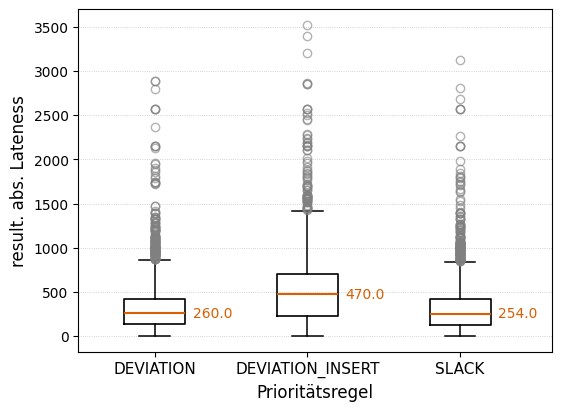

In [4]:
fig, axes = plot_experiment_boxrow(
    df_values=df_metrics,
    df_meta=df_experiments,
    value_col="Abs_Lateness",
    x_col="Experiment_Type", x_col_as= r"Prioritätsregel",
    value_as="result. abs. Lateness",
    median_fmt = ".1f",
    ratio_label_on=False
)

plt.show()

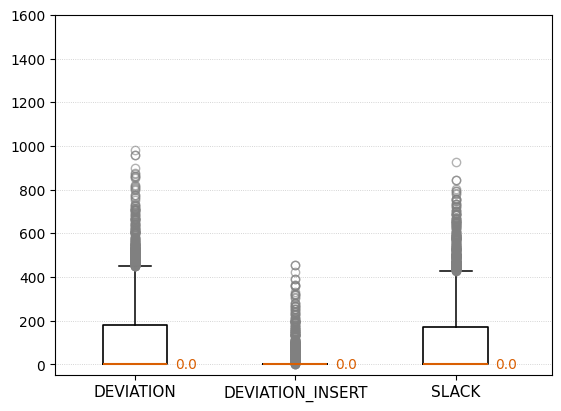

In [5]:
fig, axes = plot_experiment_boxrow(
    df_values=df_metrics,
    df_meta=df_experiments,
    value_col="Tardiness",
    x_col="Experiment_Type", x_col_as= "",
    value_as="",
    median_fmt = ".1f",
    ratio_label_on=False,
    ymax=1600
)
fig.savefig("output/Evaluation_GT_Experiment_boxrow_tardiness.pdf")
plt.show()

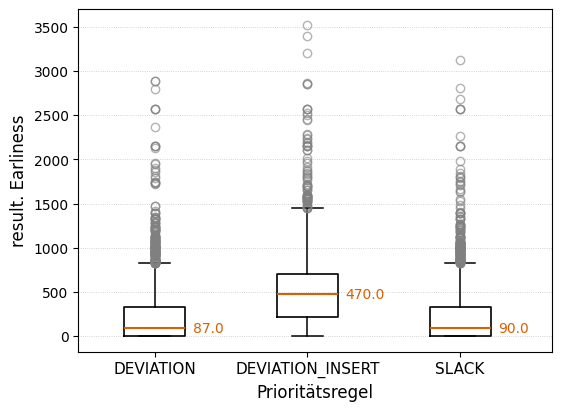

In [6]:
fig, axes = plot_experiment_boxrow(
    df_values=df_metrics,
    df_meta=df_experiments,
    value_col="Earliness",
    x_col="Experiment_Type", x_col_as= r"Prioritätsregel",
    value_as="result. Earliness",
    median_fmt = ".1f",
    ratio_label_on=False
)
plt.show()

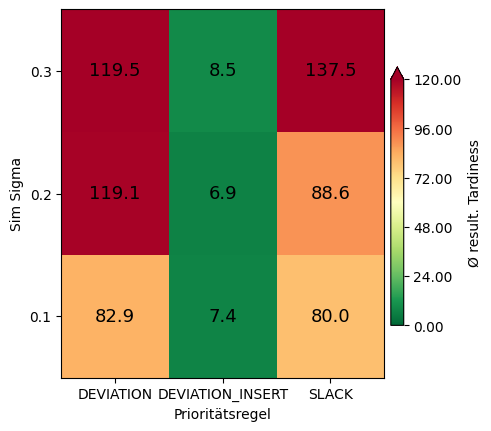

In [7]:
plt.show()
fig, axes = plot_experiment_heatmaps_good_low(
    df_values=df_metrics,
    df_meta=df_experiments,
    value_col="Tardiness", value_as="Ø result. Tardiness",
    x_col="Experiment_Type", x_col_as=r"Prioritätsregel",
    y_col="Sim Sigma", y_col_as=r"Sim Sigma",
    vmin=0.0, vmax=120,
    #vmax=df_experiments["Mean_Tardiness"].max(),
    annot=True, fmt=".1f",
    extend="auto",
    xlabel_at_col=1,
    ratio_label_on=False
)

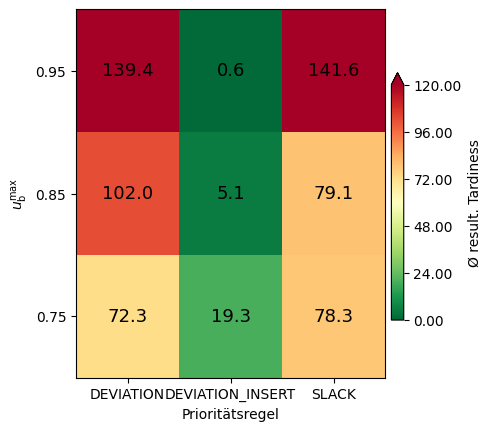

In [8]:
fig, axes = plot_experiment_heatmaps_good_low(
    df_values=df_metrics,
    df_meta=df_experiments,
    value_col="Tardiness", value_as="Ø result. Tardiness",
    x_col="Experiment_Type", x_col_as= r"Prioritätsregel",
    y_col="Max Bottleneck Utilization", y_col_as=  r"$u_{\mathrm{b}}^{\max}$",
    vmin=0.0, vmax= 120,
    #vmax=df_experiments["Mean_Tardiness"].max(),
    annot=True, fmt=".1f",
    extend="auto",
    xlabel_at_col = 1,
    ratio_label_on=False
)

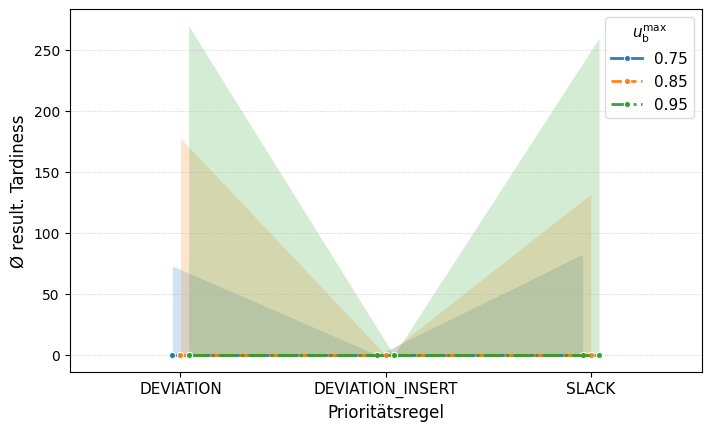

In [9]:
fig, ax = plot_experiment_lines_compare(
    df_values=df_metrics,
    df_meta=df_experiments,
    value_col="Tardiness", value_as="Ø result. Tardiness",
     x_col="Experiment_Type", x_col_as= r"Prioritätsregel",
    compare_col="Max Bottleneck Utilization",
    compare_col_as=r"$u_{\mathrm{b}}^{\max}$",
    agg_method="median",
    show_quantile_band=True,
    quantile_band=(0.25, 0.75),
    ratio_label_on=False
)
plt.show()

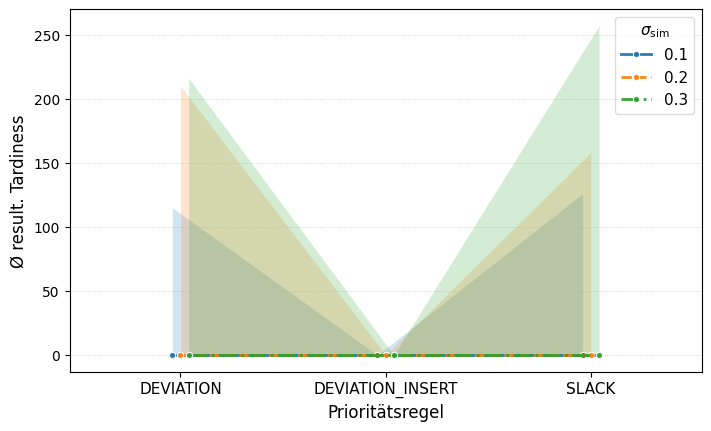

In [10]:
fig, ax = plot_experiment_lines_compare(
    df_values=df_metrics,
    df_meta=df_experiments,
    value_col="Tardiness", value_as="Ø result. Tardiness",
     x_col="Experiment_Type", x_col_as= r"Prioritätsregel",
    compare_col="Sim Sigma",
    compare_col_as=r"$\sigma_{\mathrm{sim}}$",
    agg_method="median",
    show_quantile_band=True,
    quantile_band=(0.25, 0.75),
    ratio_label_on=False
)
plt.show()

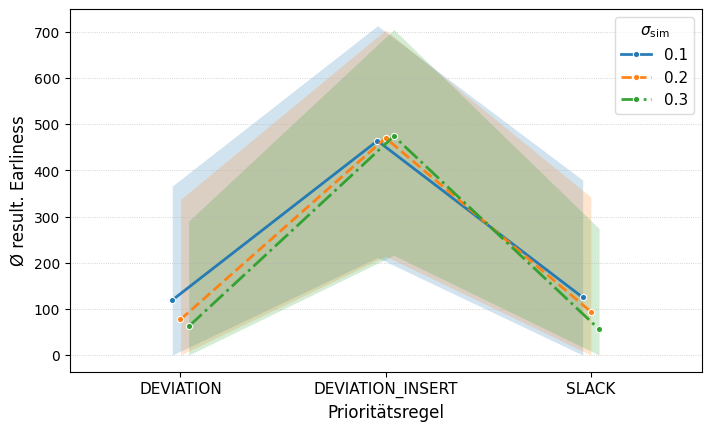

In [11]:
fig, ax = plot_experiment_lines_compare(
    df_values=df_metrics,
    df_meta=df_experiments,
    value_col="Earliness", value_as="Ø result. Earliness",
     x_col="Experiment_Type", x_col_as= r"Prioritätsregel",
    compare_col="Sim Sigma",
    compare_col_as=r"$\sigma_{\mathrm{sim}}$",
    agg_method="median",
    show_quantile_band=True,
    quantile_band=(0.25, 0.75),
    ratio_label_on=False
)
plt.show()